<a href="https://colab.research.google.com/github/yuta-kanematsu/TU_math_study/blob/main/Chap09_Cm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 途中で使用するため、あらかじめ読み込んでおいてください。
# データ加工・処理・分析ライブラリ
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ
import sklearn

# 小数第３位まで表示
%precision 3

'%.3f'

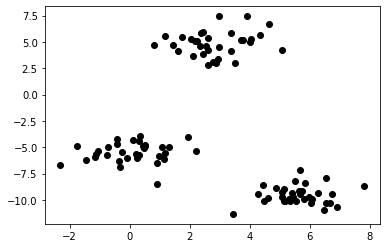

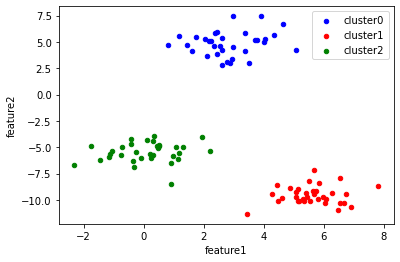

In [ ]:
#09-02-02
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
#サンプルデータ生成
X, _ = make_blobs(random_state=10)
#グラフ描画
plt.scatter(X[:,0], X[:,1], color='black')

#クラスター番号を予測
kmeans= KMeans(init='random', n_clusters=3)

kmeans.fit(X)

y_pred = kmeans.predict(X)

#クラスタリング結果のグラフ化
merge_data = pd.concat([pd.DataFrame(X[:,0]), pd.DataFrame(X[:,1]), pd.DataFrame(y_pred)], axis=1)
merge_data.columns = ['feature1', 'feature2', 'cluster']

ax = None
colors = ['blue', 'red', 'green']
for i, data in merge_data.groupby('cluster'):
  ax = data.plot.scatter(x='feature1', y='feature2', color=colors[i], label=f'cluster{i}', ax=ax)

Text(0, 0.5, 'Distortion')

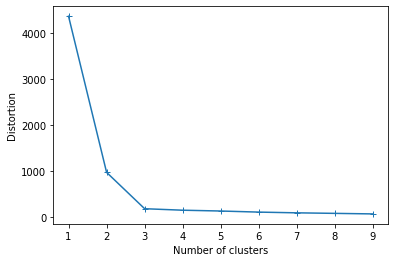

In [ ]:
#09-02-04
#エルボー法による推定
dist_list =[]
for i in range(1,10):
    kmeans= KMeans(n_clusters=i, init='random', random_state=0)
    kmeans.fit(X)
    dist_list.append(kmeans.inertia_)
    
plt.plot(range(1,10), dist_list,marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

Text(0, 0.5, 'Distortion')

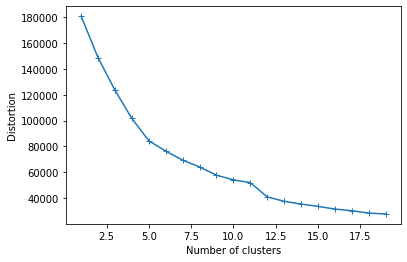

In [ ]:
#クラスター数を増やす
import requests, zipfile
import io

zip_file_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'

r = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()
bank= pd.read_csv('bank-full.csv', sep=';')
bank_sub = bank[['age','balance','campaign','previous']]

# 標準化
sc = StandardScaler()
sc.fit(bank_sub)
bank_sub_std = sc.transform(bank_sub)

dist_list =[]
for i in range(1,20):
    kmeans= KMeans(n_clusters=i, init='random', random_state=0)
    kmeans.fit(bank_sub_std)
    dist_list.append(kmeans.inertia_)
    
plt.plot(range(1,20), dist_list,marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

相関係数:-0.960:
[[ 0.707 -0.707]
 [-0.707 -0.707]]
各主成分の分散:[1.98 0.04]
各主成分の分散割合:[0.98 0.02]


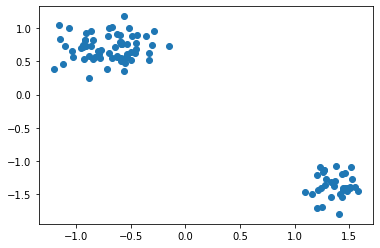

In [ ]:
#09-03-01
#主成分分析
from sklearn.preprocessing import StandardScaler

sample = np.random.RandomState(1)
x = np.dot(sample.rand(2, 2), sample.randn(2, 200)).T

sc = StandardScaler()
X_std = sc.fit_transform(X)

print('相関係数:{:.3f}:'.format(sp.stats.pearsonr(X_std[:,0], X_std[:,1])[0]))
plt.scatter(X_std[:,0], X_std[:,1])

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_std)
print(pca.components_)
print('各主成分の分散:{}'.format(pca.explained_variance_))
print('各主成分の分散割合:{}'.format(pca.explained_variance_ratio_))


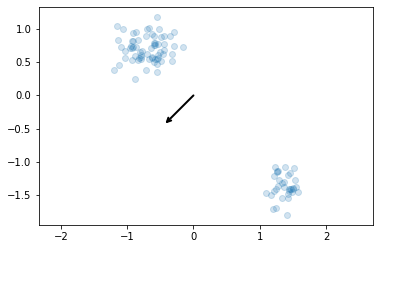

In [ ]:

arrowprops = dict(arrowstyle='->',
                  linewidth=2,
                  shrinkA=0, shrinkB=0)

def draw_vector(v0, v1):
  plt.gca().annotate('', v1, v0, arrowprops=arrowprops)

plt.scatter(X_std[:,0], X_std[:,1], alpha=0.2)

for length, vector in zip(pca.explained_variance_, pca.components_):
  v = vector * 3 * np.sqrt(length)
  draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal');

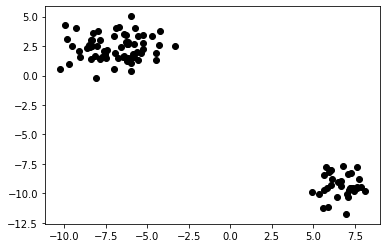

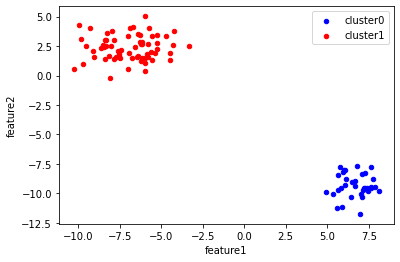

In [ ]:
#Ex09-01
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(random_state=52)
plt.scatter(X[:,0],X[:,1],color='black')

kmeans= KMeans(init='random', n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

merge_data = pd.concat([pd.DataFrame(X[:,0]), pd.DataFrame(X[:,1]), pd.DataFrame(y_pred)], axis=1)
merge_data.columns = ['feature1', 'feature2', 'cluster']

ax = None
colors = ['blue', 'red']
for i, data in merge_data.groupby('cluster'):
  ax = data.plot.scatter(x='feature1', y='feature2', color=colors[i],
                         label=f'cluster{i}', ax=ax)

iris_data shape:(150, 4)
x_pca shape:(150, 2)


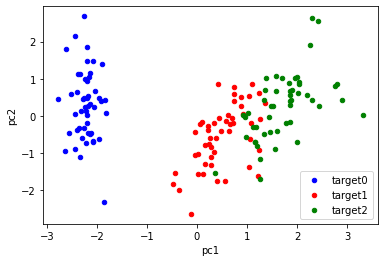

In [ ]:
#Ex09-02
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris = load_iris()
sc = StandardScaler()
sc.fit(iris.data)
x_std = sc.transform(iris.data)

pca = PCA(n_components=2)
pca.fit(x_std)
x_pca = pca.transform(x_std)

print('iris_data shape:{}'.format(iris.data.shape))
print('x_pca shape:{}'.format(x_pca.shape))

merge_data = pd.concat([pd.DataFrame(x_pca[:,0]), pd.DataFrame(x_pca[:,1]), pd.DataFrame(iris.target)], axis=1)
merge_data.columns = ['pc1', 'pc2', 'target']

ax = None
colors = ['blue', 'red', 'green']
for i, data in merge_data.groupby('target'):
  ax = data.plot.scatter(x='pc1', y='pc2', color=colors[i], label=f'target{i}', ax=ax)